In [1]:
import csv
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import jieba
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.cluster.kmeans import KMeansClusterer
from nltk.cluster.util import cosine_distance
from collections import Counter

#  classification-"wordbank_instrument_data.csv"

In [2]:
# read csv file
# understands
import nltk,csv
data = pd.read_csv("wordbank_instrument_data (1).csv")
data=data.fillna(0)
data=data[(data['value'] =="understands")| (data['value'] =="produces")]

num_columns=data.shape[1]
num_rows=data.shape[0]
print("There are {} data in total and {} columns".format(num_rows,num_columns))
print("The columns that need to be sorted are:item_definition")
print(data["uni_lemma"])
dataset=data["uni_lemma"]

There are 1154941 data in total and 11 columns
The columns that need to be sorted are:item_definition
0                 ouch
1                 meow
2          quack quack
3            choo choo
4                  moo
              ...     
3186561              0
3186567              0
3186569              0
3186571              0
3186576              0
Name: uni_lemma, Length: 1154941, dtype: object


In [3]:
data.reset_index(drop=True, inplace=True)

In [4]:
# 删除符合条件的指定行，并替换原始df
data.drop(data[(data.uni_lemma ==0)].index,inplace=True) 

In [5]:
data

,downloaded,data_id,item_kind,category,item_id,item_definition,english_gloss,uni_lemma,child_id,age,value
0,2023-06-30,204318,word,sounds,item_1,av,av,ouch,6938,29,produces
1,2023-06-30,204318,word,sounds,item_2,mjav,meow,meow,6938,29,produces
2,2023-06-30,204318,word,sounds,item_3,rap,rap,quack quack,6938,29,produces
3,2023-06-30,204318,word,sounds,item_4,fut,fut,choo choo,6938,29,produces
4,2023-06-30,204318,word,sounds,item_5,muh,muh,moo,6938,29,produces
...,...,...,...,...,...,...,...,...,...,...,...
1154902,2023-06-30,208031,word,connecting_words,item_721,sådan,such,such,10651,31,produces
1154903,2023-06-30,208031,word,connecting_words,item_722,fordi,because,because,10651,31,produces
1154904,2023-06-30,208031,word,connecting_words,item_723,og,and,and,10651,31,produces
1154905,2023-06-30,208031,word,connecting_words,item_724,hvis,if,if,10651,31,produces


In [6]:
data=data.reset_index (drop=True)
word_list=data["uni_lemma"].tolist()
# print(len(word_list))
new_word_list=[]
for i in range(len(word_list)):
#     print(word_list[i])
#     print(data.index)
    if word_list[i]!=0:
        if "(" in word_list[i]:
            new_word_list.append(word_list[i].split("(")[0])
        elif "*" in word_list[i]:
    #         print(word_list[i])
            new_word_list.append(word_list[i].split("*")[0])
        elif " " in word_list[i]:
            new_word_list.append(word_list[i].split(" ")[0])
    #         print(word_list[i])
        elif "/" in word_list[i]:
            new_word_list.append(word_list[i].split("/")[0])
        else:
            new_word_list.append(word_list[i])
    else:
        data.drop(index=i)

#         print(word_list[i])1


In [7]:
catecory=[]
for k in range(len(new_word_list)):
    tokens = nltk.word_tokenize(new_word_list[k])
    pos_tags = nltk.pos_tag(tokens)
#     print(pos_tags[0][1])
    catecory.append(pos_tags[0][1])

In [8]:
# 1.	CC	Coordinating conjunction
# 2.	CD	Cardinal number	
# 3.	DT	Determiner
# 4.	EX	Existential there
# 5.	FW	Foreign word
# 6.	IN	Preposition or subordinating conjunction
# 7.	JJ	Adjective
# 8.	JJR	Adjective, comparative
# 9.	JJS	Adjective, superlative
# 10.	LS	List item marker
# 11.	MD	Modal
# 12.	NN	Noun, singular or mass
# 13.	NNS	Noun, plural
# 14.	NNP	Proper noun, singular
# 15.	NNPS	Proper noun, plural
# 16.	PDT	Predeterminer
# 17.	POS	Possessive ending
# 18.	PRP	Personal pronoun
# 19.	PRP$	Possessive pronoun
# 20.	RB	Adverb
# 21.	RBR	Adverb, comparative
# 22.	RBS	Adverb, superlative
# 23.	RP	Particle
# 24.	SYM	Symbol
# 25.	TO	to
# 26.	UH	Interjection
# 27.	VB	Verb, base form
# 28.	VBD	Verb, past tense
# 29.	VBG	Verb, gerund or present participle
# 30.	VBN	Verb, past participle
# 31.	VBP	Verb, non-3rd person singular present
# 32.	VBZ	Verb, 3rd person singular present
# 33.	WDT	Wh-determiner
# 34.	WP	Wh-pronoun
# 35.	WP$	Possessive wh-pronoun
# 36.	WRB	Wh-adverb

In [9]:
catecory=pd.DataFrame(catecory)
df = catecory.value_counts() 
data['new'] = catecory #Insert data into new column new
# data.to_csv(r"new1.csv",mode = 'a',index =False)
# path=r"new1.csv"
# data=pd.read_csv(path)

In [10]:
len(data["new"])

1065493

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times


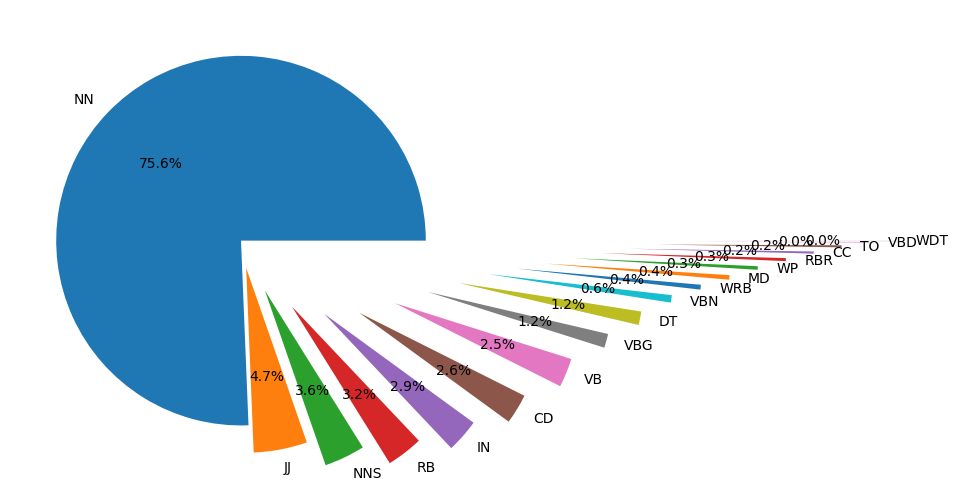

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='Times'
plt.figure(figsize=(6,6))
label=df.index
new_label=[]
for n in range(len(label)):
#     print(label[n][0])
    new_label.append(label[n][0])
explode=np.zeros(len(new_label))# Set each item to n radii from the centre of the circle
for n in range(len(explode)):
    explode[n]=0.15*n
values=df.to_list()
plt.pie(values,explode=explode,labels=new_label,autopct='%1.1f%%')
plt.show()

### The ability to learn different categories of words at different ages

In [14]:
age_sorted=sorted(np.unique(data["age"].to_list())[:-1])

In [15]:
all=np.zeros((len(age),len(age_sorted)))

In [16]:
for a in range(len(age_sorted)):
    Age=data[data['age'] == int(age_sorted[a])]["new"].value_counts() 
    game = Age.index
#     print(game)
    tmp=[]
    # Age=Age.to_list()
    for p in range(len(Age)):
        all[p,a]=Age[p]


In [17]:
label

MultiIndex([( 'NN',),
            ( 'JJ',),
            ('NNS',),
            ( 'RB',),
            ( 'IN',),
            ( 'CD',),
            ( 'VB',),
            ('VBG',),
            ( 'DT',),
            ('VBN',),
            ('WRB',),
            ( 'MD',),
            ( 'WP',),
            ('RBR',),
            ( 'CC',),
            ( 'TO',),
            ('VBD',),
            ('WDT',)],
           )

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times


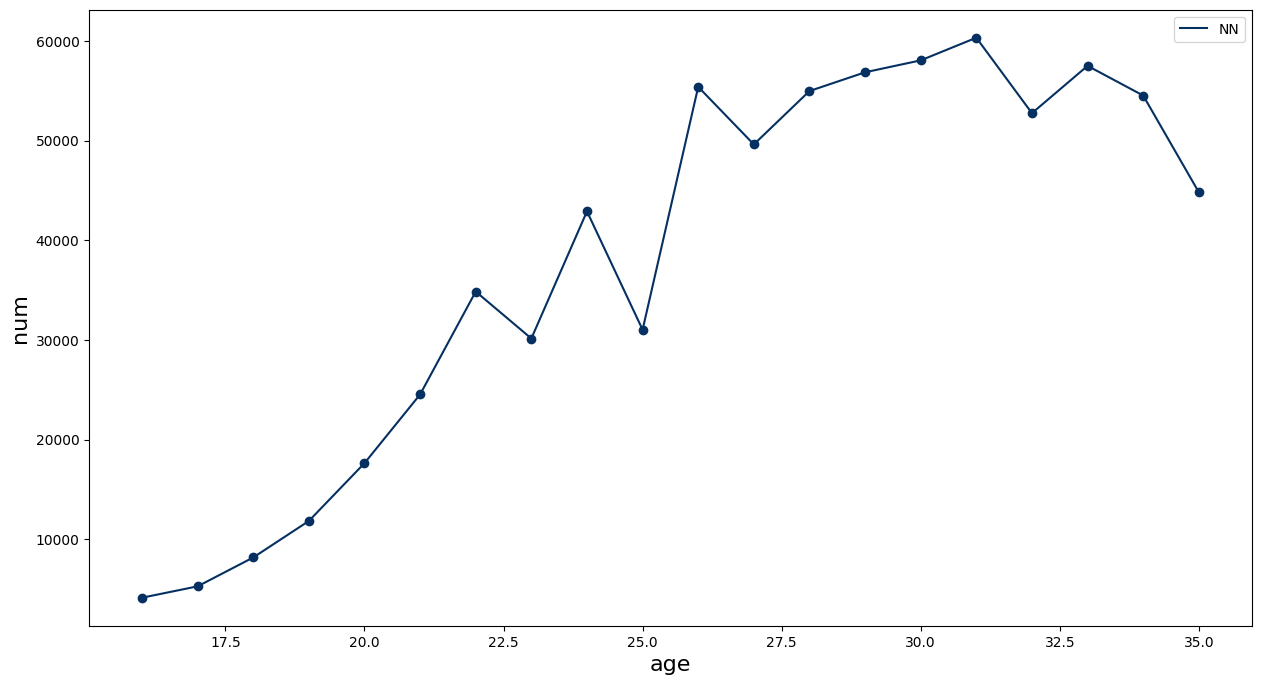

In [18]:
# all
colors = plt.get_cmap('RdBu',len(Age.index)*2)
plt.figure(figsize=(15, 8), dpi=100)

game = all[0,:]
scores =age_sorted
plt.plot(scores, game,label=Age.index[0], c=plt.get_cmap('RdBu',10)([a]))
plt.scatter(scores, game,c=plt.get_cmap('RdBu',10)([a]))
plt.yticks()

plt.xlabel("age", fontdict={'size': 16})
plt.ylabel("num", fontdict={'size': 16})
plt.legend()
plt.show()

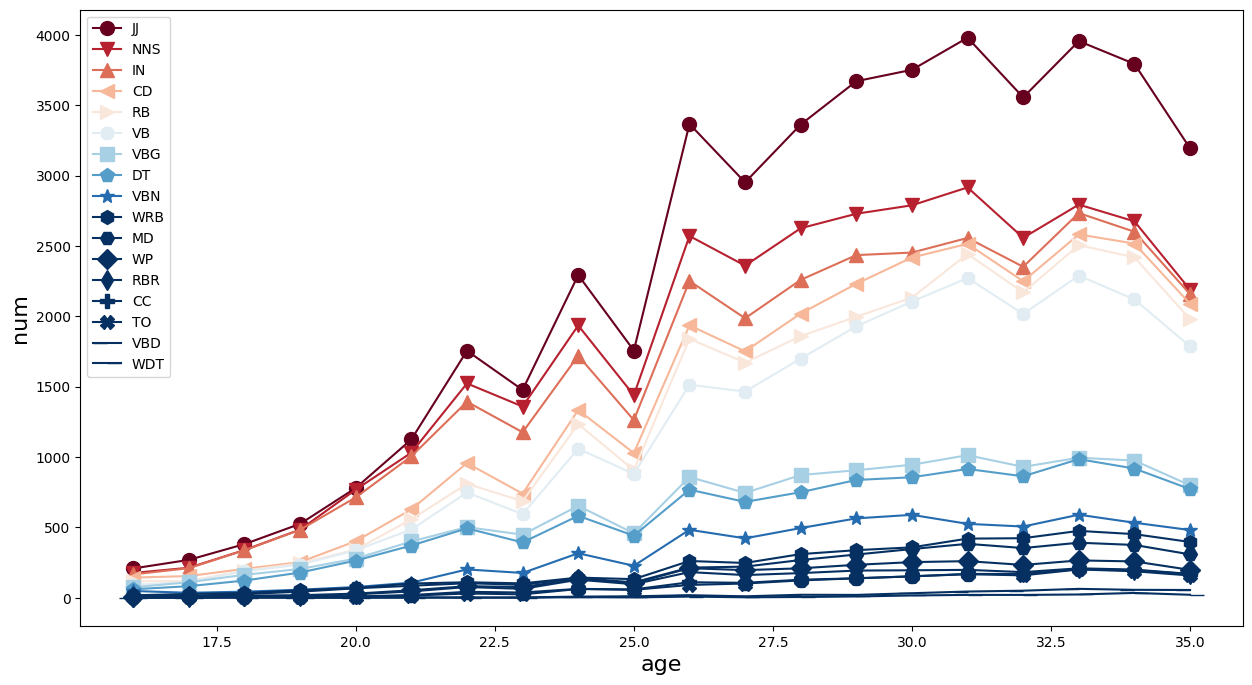

In [19]:
# all
colors = plt.get_cmap('RdBu',len(Age.index)*2)
plt.figure(figsize=(15, 8), dpi=100)
lists=[ 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X',0,1,2,3,4,5,"p"]

for a in range(len(Age[1:].index)):
#     print(Age.index[a])
    game = all[1:,:][a,:]
    scores =age_sorted
    plt.plot(scores, game,label=Age[1:].index[a], c=plt.get_cmap('RdBu',10)([a]),marker=lists[a],markersize=10)
#     plt.scatter(scores, game,c=plt.get_cmap('RdBu',10)([a]))
    plt.yticks()
#     plt.annotate("(%s,%s)" % scores, xy=xy, xytext=(-20, 10), textcoords='offset points', weight='heavy')

plt.xlabel("age", fontdict={'size': 16})
plt.ylabel("num", fontdict={'size': 16})
plt.legend()
plt.show()
    

In [20]:
all.shape

(20, 20)

In [21]:
age_sorted[1:]

[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

In [22]:
# read csv file
import nltk,csv
data1 = pd.read_csv("wordbank_item_data.csv")

num_columns=data1.shape[1]
num_rows=data1.shape[0]
print("There are {} data in total and {} columns".format(num_rows,num_columns))
print("The columns that need to be sorted are:item_definition")
print(data1["category"])
dataset1=data["category"]

There are 725 data in total and 25 columns
The columns that need to be sorted are:item_definition
0                sounds
1                sounds
2                sounds
3                sounds
4                sounds
             ...       
720    connecting_words
721    connecting_words
722    connecting_words
723    connecting_words
724    connecting_words
Name: category, Length: 725, dtype: object


In [23]:
word_list1=data1["category"].tolist()
for i in range(len(word_list1)):
#     print(word_list[i])
    if "(" in word_list1[i]:
        word_list1[i]=word_list1[i].split("(")[0]
    if "*" in word_list1[i]:
#         print(word_list[i])
        word_list1[i]=word_list1[i].split("*")[0]
    if " " in word_list1[i]:
        word_list1[i]=word_list1[i].split(" ")[0]
#         print(word_list[i])
    if "/" in word_list1[i]:
        word_list1[i]=word_list1[i].split("/")[0]
#         print(word_list[i])
        

findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.


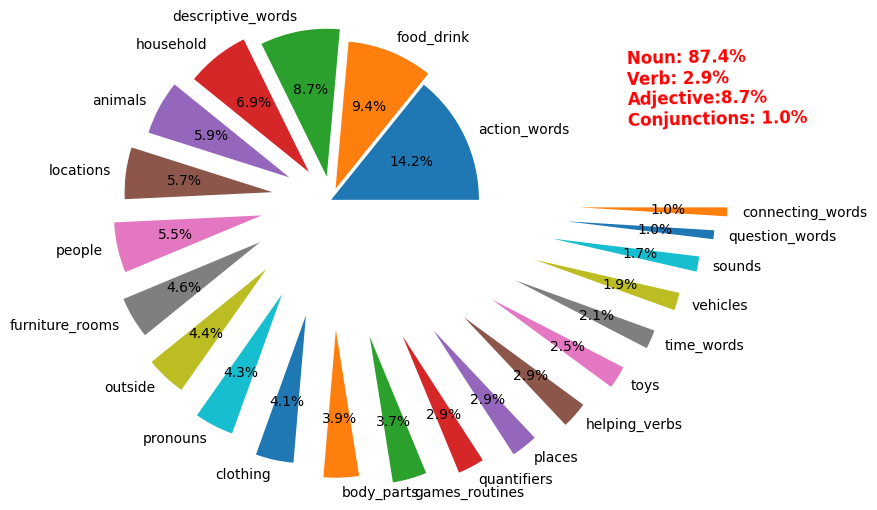

In [24]:
p=data1["category"].value_counts()
explode=np.zeros(len(p.index))# Set each item to n radii from the centre of the circle
for n in range(len(explode)):
    explode[n]=0.08*n

plt.pie(p.values,explode=explode,labels=p.index,autopct='%1.1f%%')
plt.text(x=2,#文本x轴坐标 
         y=0.5, #文本y轴坐标
         s='Noun: 87.4%\nVerb: 2.9%\nAdjective:8.7%\nConjunctions: 1.0%', #文本内容
         rotation=1,#文字旋转
         ha='left',#x=2.2是文字的左端位置，可选'center', 'right', 'left'
         va='baseline',#y=8是文字的低端位置，可选'center', 'top', 'bottom', 'baseline', 'center_baseline'
         fontdict=dict(fontsize=12, color='r',
                       family='Times',#字体,可选'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'
                       weight='bold',#磅值，可选'light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black'
                      
                      )#字体属性设置
        )
plt.show()